In [7]:
import numpy as np
import matplotlib.pyplot as plt
import random

n=20

#binary channel
x = random.random()
y = random.random()
cost = [[x,1-x],[y,1-y]]
p0 = random.random()
p1 = random.random()

print(cost)
print(p0,p1)

bit_stream = [ random.randint(0,1) for _ in range(n) ]
noisy_bit_stream = []

def add_noise(bit_stream, p0, p1):
    for bit in bit_stream:
        if bit == 0:
            if random.random() >p0:
                noisy_bit_stream.append(1)
            else:
                noisy_bit_stream.append(0)
        else:
            if random.random() >p1:
                noisy_bit_stream.append(0)
            else:
                noisy_bit_stream.append(1)

add_noise(bit_stream,p0,p1)

# print(bit_stream)
# print(noisy_bit_stream)
                

[[0.17394809200895478, 0.8260519079910452], [0.9777796774190666, 0.022220322580933427]]
0.9308256834641914 0.6455712247055868


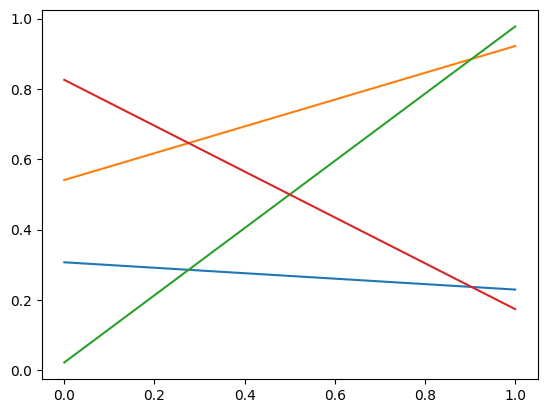

In [8]:
#minimax

M= 100
prior = np.linspace(0,1,M+1)

#accept rule #1
accept_cost = prior*(cost[0][0]*p0 + cost[1][0]*(1-p0)) + (1-prior)*(cost[1][1]*p1 + cost[0][1]*(1-p1))
#reject rule #2
reject_cost = prior*(cost[0][0]*(1-p0) + cost[1][0]*p0) + (1-prior)*(cost[1][1]*(1-p1) + cost[0][1]*p1)
#decide 1 rule #3
decide1_cost = prior*(cost[1][0]) + (1-prior)*(cost[1][1])
#decide 0 rule #4
decide0_cost = prior*(cost[0][0]) + (1-prior)*(cost[0][1])

#min cost  MIN
min_cost =  []
decision_rule = []         

for i in range(M+1):
    costs =  [accept_cost[i],reject_cost[i],decide1_cost[i],decide0_cost[i]]
    m = min(costs)
    min_cost.append(m)
    decision_rule.append(costs.index(m))

plt.plot(prior,accept_cost)
plt.plot(prior,reject_cost)
plt.plot(prior,decide1_cost)
plt.plot(prior,decide0_cost)


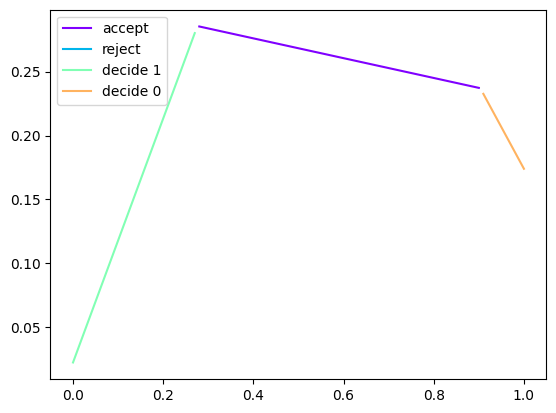

In [9]:
rules = ['accept','reject','decide 1','decide 0']
for color_index in range(4):
    ind = np.where(np.array(decision_rule)==color_index)[0]
    plt.plot(np.array(prior)[ind],np.array(min_cost)[ind],label=f'{rules[color_index]}',color=plt.cm.rainbow(color_index/4))
    plt.legend()



In [ ]:
def decide(bit,rule):
    match rule:
        case 0:
            return 1
        case 1:
            return bit
        case 2:
            return abs(bit-1)
        case 3:
            return 0

detected_stream = []
p = 0.6
for bit in noisy_bit_stream:
    detected_stream.append(decide(bit,rule))